In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image

In [2]:
img = Image.open('assets/lenna.png').convert('L')

# Preview a default image

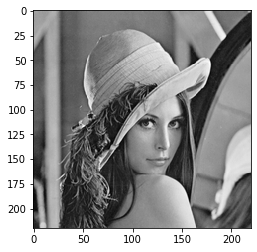

In [3]:
plt.imshow(img, cmap='gray')

In [4]:
# convert image into a numpy array
img = np.asarray(img)

## Add a SUSAN adaptive filter

In [5]:
def susan_filter(image, size, theta, tau, x, y):
    """
    SUSAN filter. Is used for sharpening images and reduce noise.
    """
    half = round(size/2)
    source = np.pad(image, (size, size), 'symmetric').astype(np.float32)
    
    x_grid, y_grid = np.mgrid[-half:(size - half), -half:(size - half)]
    w_distance = np.exp(-((x_grid**2)+(y_grid**2))/float(2*theta**2))
    w_color = np.exp(-((source[x:x+size, y:y+size] - image[x][y]) ** 2) / float(2*tau ** 2))
    w = w_distance * w_color
    filtered_image = np.sum(w * source[x:x+size, y:y+size]) / np.sum(w)

    return filtered_image

In [6]:
def convolution2d(image, kernel_size, theta, tau):
    y, x = image.shape
    y = y - kernel_size + 1
    x = x - kernel_size + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = susan_filter(image, kernel_size, theta, tau, i, j)
    return new_image

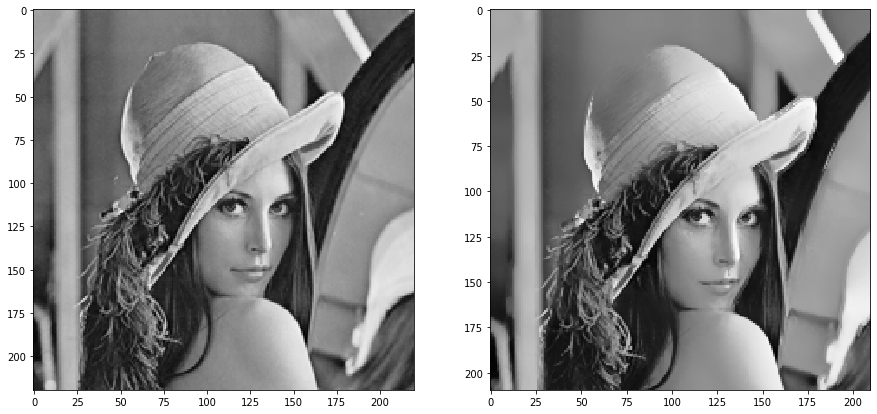

In [11]:
filtered_img = convolution2d(img, 11, 10.0, 10.0)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')

plt.show(block=True)

## Try with different parameters

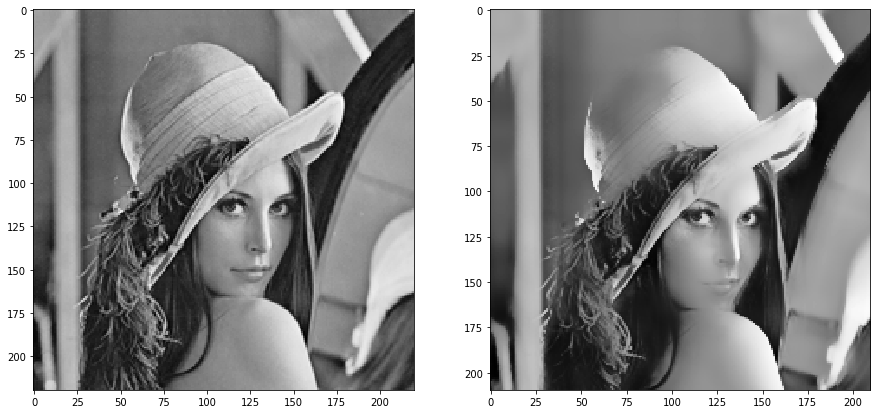

In [14]:
filtered_img = convolution2d(img, 11, 25.0, 25.0)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')

plt.show(block=True)

As we can see, if we increase the tau parameter to high, colors get merged too much and we get too high color equalization.

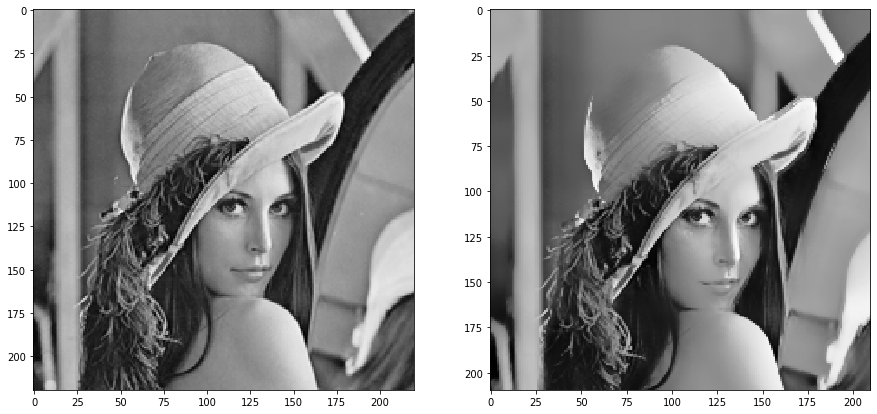

In [17]:
filtered_img = convolution2d(img, 11, 25.0, 15.0)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')

plt.show(block=True)

Decreasing theta to optimal limits, the noise on the image reduces and the image becomes sharper.